In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
from sklearn.datasets import make_classification

from utilities import generate_data, plot_predictions, plot_svc_decision_function

In [2]:
datasets_train, datasets_test = generate_data()

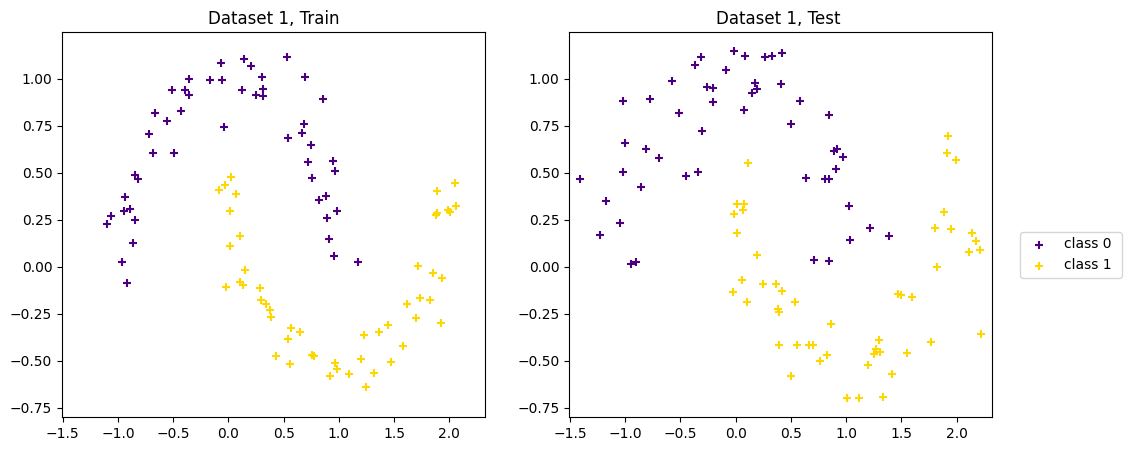

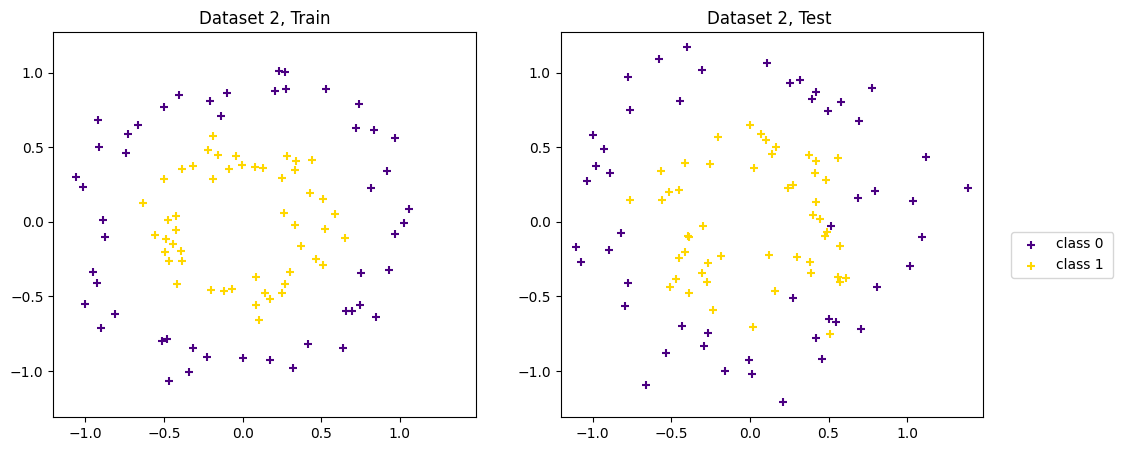

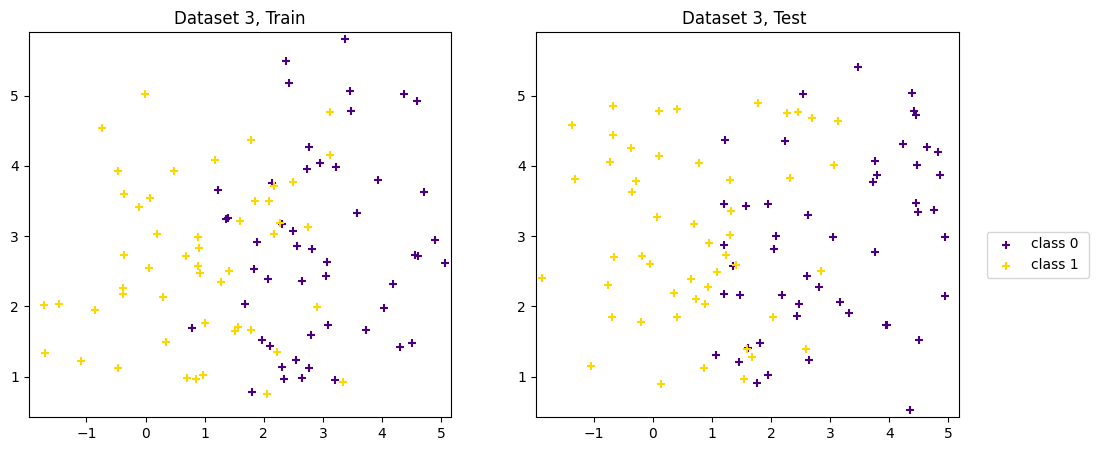

In [3]:
for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    Y = ds_train[1]

    X_test = ds_test[0]
    Y_test = ds_test[1]

    i_c0 = (Y == 0)
    i_c1 = (Y == 1)

    i_c0_t = (Y[i_c0]==0); i_c0_f = (Y[i_c0]==1)
    i_c1_t = (Y[i_c1]==1); i_c1_f = (Y[i_c1]==0)

    plot_predictions(i+1, X, Y, X_test, Y_test, pred_train=Y, pred_test=Y_test)

In [4]:
def train_LSC(X, Y):
    Y = ds_train[1]*2-1
    Y = Y.reshape(Y.size, 1)

    A = np.linalg.inv(np.dot(X.T, X))
    B = np.dot(X.T, Y)

    return np.dot(A, B)

def calculate_decison_boundary(W):
    x_1 = np.linspace(-10, 10)
    x_2 = (-W[0] - W[1]*x_1)/W[2]

    return x_1, x_2

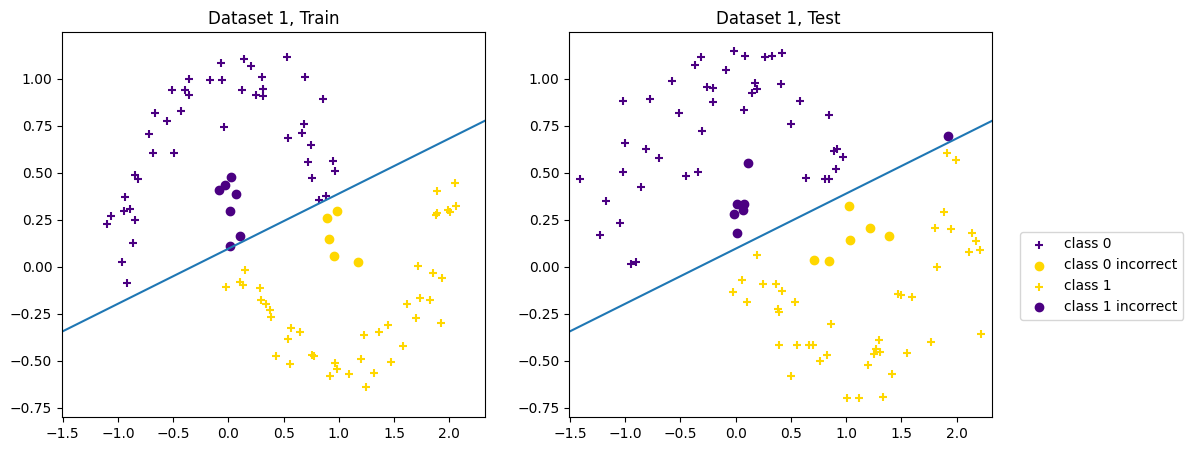

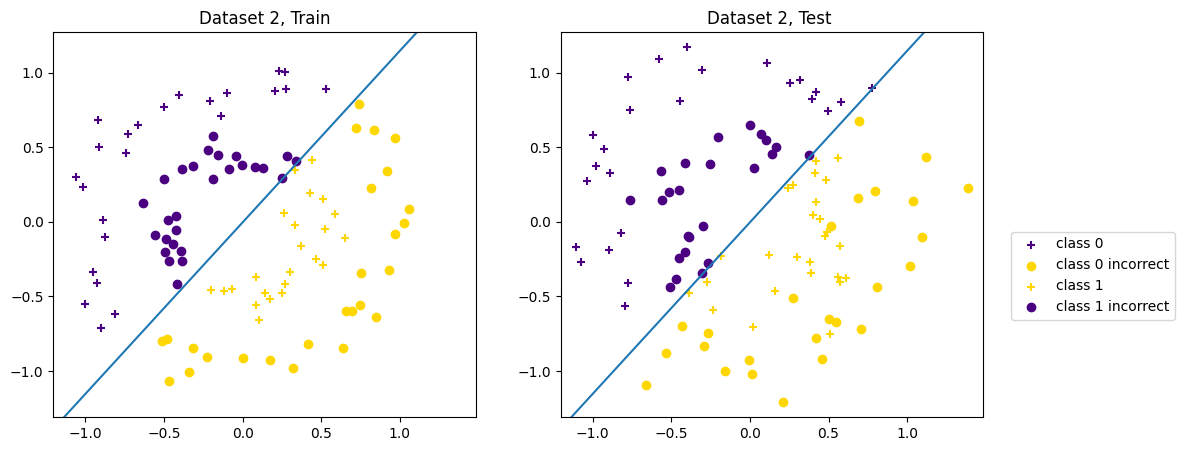

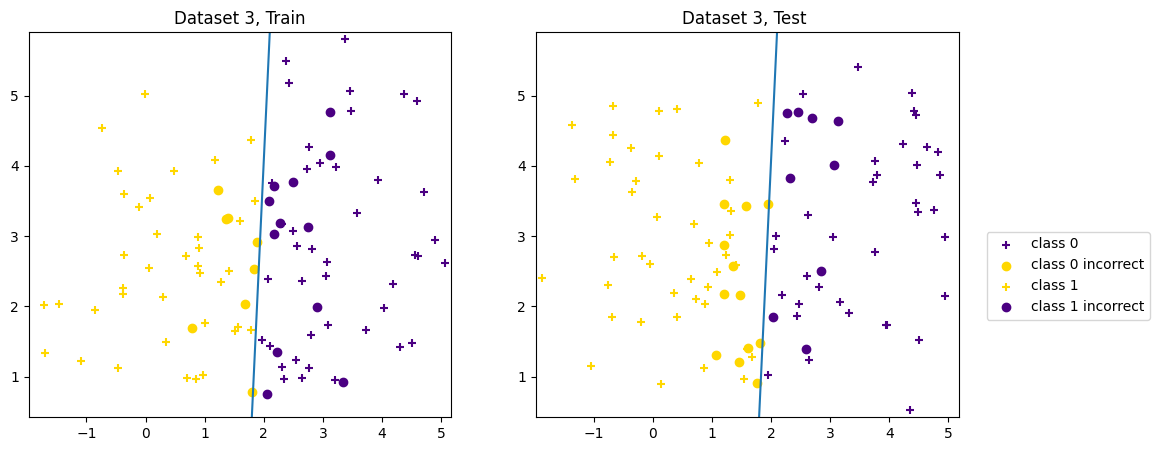

In [5]:
for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    X_b = np.array([np.ones(len(X)), X[:, 0], X[:, 1]]).T

    X_test = ds_test[0]
    X_test_b = np.array([np.ones(len(X_test)), X_test[:, 0], X_test[:, 1]]).T

    Y = ds_train[1]
    Y_test = ds_test[1]

    W = train_LSC(X_b, Y)

    y_x = np.dot(W.T, X_test_b.T)
    pred_test = 1*(y_x>0)[0]

    y_x = np.dot(W.T, X_b.T)
    pred_train = 1*(y_x>0)[0]

    line_x, line_y = calculate_decison_boundary(W)

    plot_predictions(i+1 ,X,Y, X_test, Y_test, pred_train, pred_test, line_x, line_y)

## Naive Bayes

In [6]:
X, Y = datasets_train[1]
X_test, Y_test = datasets_test[1]

i_c0 = (Y == 0)
i_c1 = (Y == 1)

X_0 = X[i_c0]
X_1 = X[i_c1]

In [7]:
def calculate_prios(X_0, X_1, Y):
    prior_k1 = sum(Y) / len(Y)
    prior_k0 = 1 - prior_k1

    prior_dict = {'class 0':prior_k0, 'class 1':prior_k1}
    return prior_dict

In [8]:
prior_dict = calculate_prios(X_0, X_1, Y)
print(prior_dict)

{'class 0': 0.5, 'class 1': 0.5}


In [9]:
def calculate_MLE(X_0,X_1):
    class_summaries = dict()

    feat_0_class_0 = np.mean(X_0[:, 0]), np.std(X_0[:, 0])
    feat_1_class_0 = np.mean(X_0[:, 1]), np.std(X_0[:, 1])
    class_summaries['class 0'] = [feat_0_class_0, feat_1_class_0]

    feat_0_class_1 = np.mean(X_1[:, 0]), np.std(X_1[:, 0])
    feat_1_class_1 = np.mean(X_1[:, 1]), np.std(X_1[:, 1])
    class_summaries['class 1'] = [feat_0_class_1, feat_1_class_1]

    return class_summaries

In [10]:
class_summaries = calculate_MLE(X_0, X_1)

In [11]:
for c, class_summary in class_summaries.items():
    print(c)
    print(class_summary)

class 0
[(-0.0071921666496483514, 0.704420431973722), (-0.008230521965483994, 0.6846599657190768)]
class 1
[(-0.0036797462219995036, 0.36171707161392364), (-0.011058582492496053, 0.3425693756367293)]


In [12]:
def Gaussien_PDF(x, mean, stdev):
    exponent = np.exp(-((x - mean)**2) / (2 * stdev**2))
    return (1  / (np.sqrt(2 * np.pi) * stdev)) * exponent

In [13]:
test_point = X_test[2]
print('test point: ', test_point)
print(f'value of feature 1: {test_point[0]}, value of feature 2: {test_point[1]}')

test point:  [ 0.7078584 -0.721475 ]
value of feature 1: 0.7078584041289085, value of feature 2: -0.721474995667992


In [14]:
def calculate_probability(X_test, class_summaries, prior_dict):
    resulting_probabilities = dict()

    for c, class_satats in class_summaries.items():
        prior_c = prior_dict[c]
        resulting_probabilities[c] = prior_c

        for i, feature_stat in enumerate(class_satats):
            mean, stdev = feature_stat
            resulting_probabilities[c] *= Gaussien_PDF(X_test[i], mean, stdev)
    
    return resulting_probabilities

In [15]:
print(test_point)
probs = calculate_probability(test_point, class_summaries, prior_dict)
print(probs)

[ 0.7078584 -0.721475 ]
{'class 0': 0.05728953380422133, 'class 1': 0.010803175622848884}


In [16]:
def train_NB(X, Y):
    i_c0 = (Y == 0)
    i_c1 = (Y == 1)

    X_0 = X[i_c0]
    X_1 = X[i_c1]

    prior_dict = calculate_prios(X_0, X_1, Y)

    class_summaries = calculate_MLE(X_0, X_1)
    
    return prior_dict, class_summaries

def test_NB(X, class_summaries, prior_dict):
    result = []
    for x_test in X:
        probs = calculate_probability(x_test, class_summaries, prior_dict)
        result.append(list(probs.values()))

    return np.array(result)

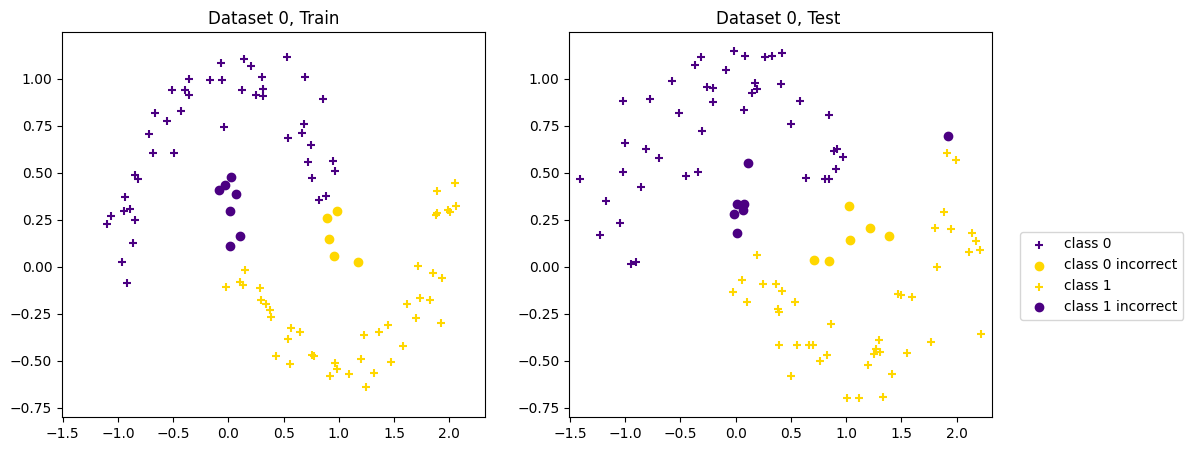

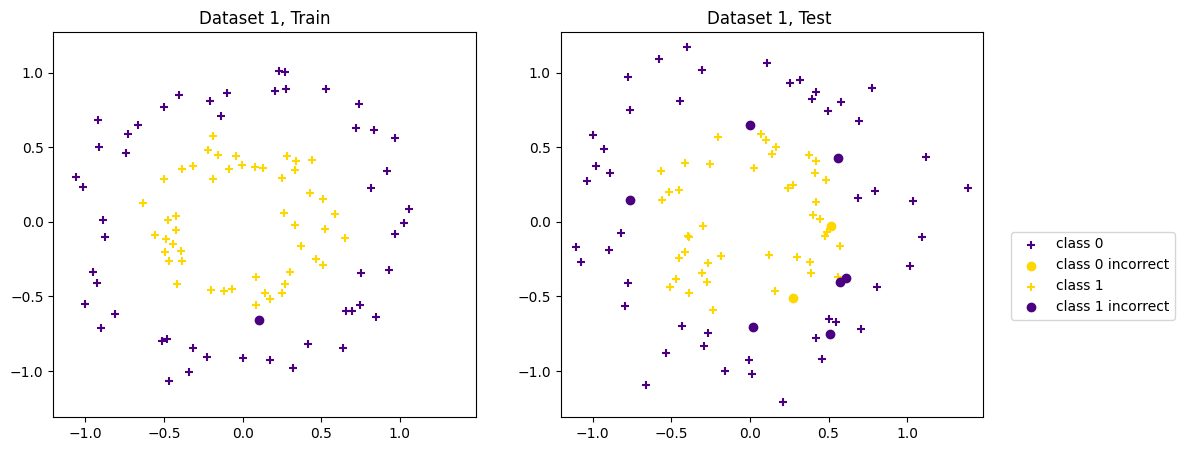

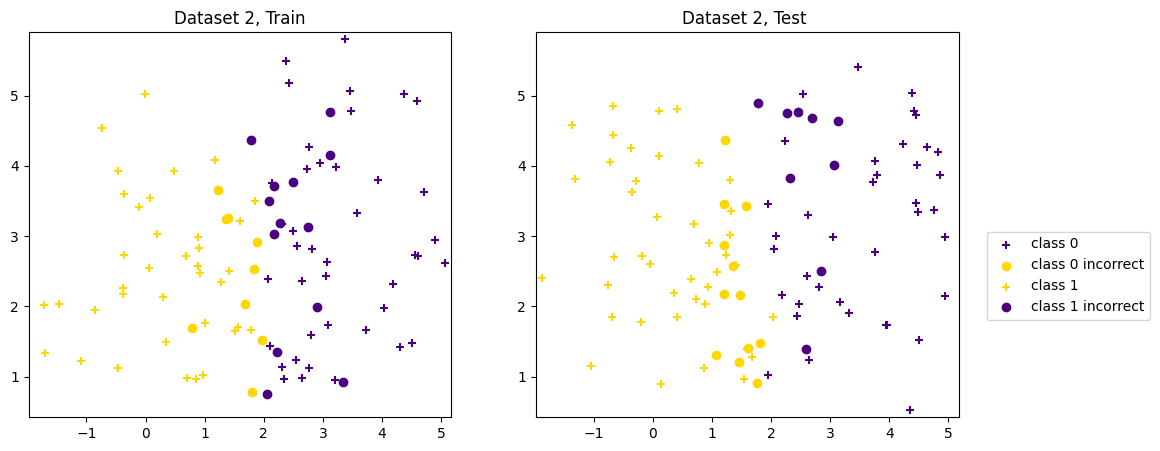

In [17]:
for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    Y = ds_train[1]    
        
    X_test = ds_test[0]
    Y_test = ds_test[1]
    # 1) train model
    prior_dict, class_summaries = train_NB(X,Y)
    
    # 2) Predict 
    # a) for test data
    posterior = test_NB(X_test, class_summaries, prior_dict)
    pred_test = np.argmax(posterior,1)

    # b) for training data
    posterior = test_NB(X, class_summaries, prior_dict)
    pred_train = np.argmax(posterior,1)
    
    # #4) plot predictions
    i_c0 = (Y == 0)
    i_c1 = (Y == 1)
    
    #TRAIN: true and false predictions 
    i_c0_t = (pred_train[i_c0]==0); i_c0_f = (pred_train[i_c0]==1)
    i_c1_t = (pred_train[i_c1]==1); i_c1_f = (pred_train[i_c1]==0)
    
    plot_predictions(i,X,Y, X_test, Y_test, pred_train, pred_test)

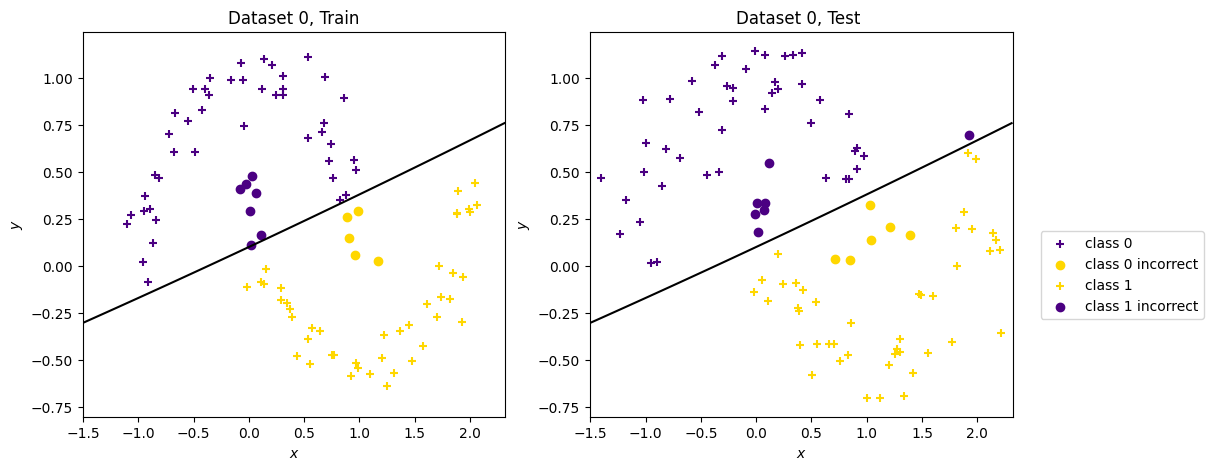

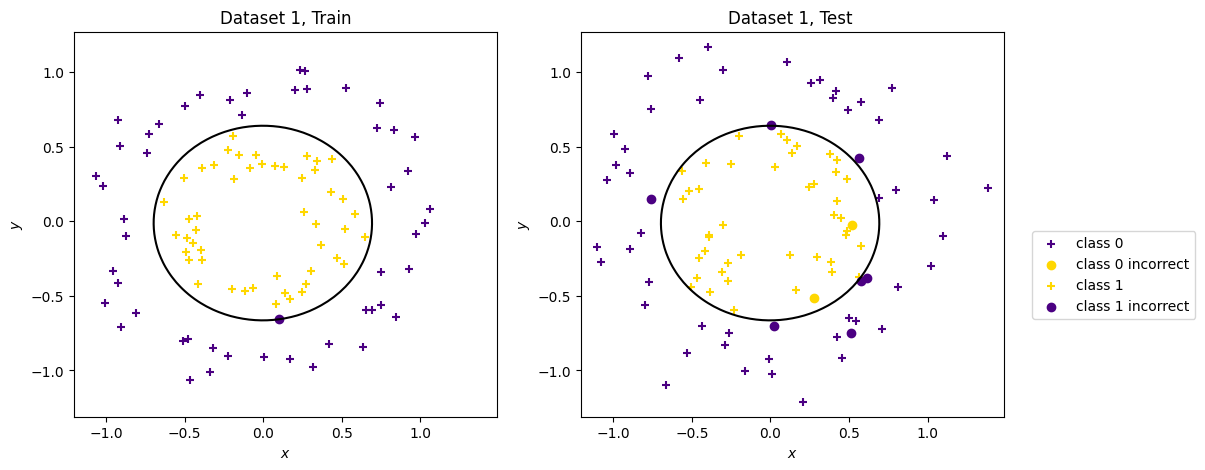

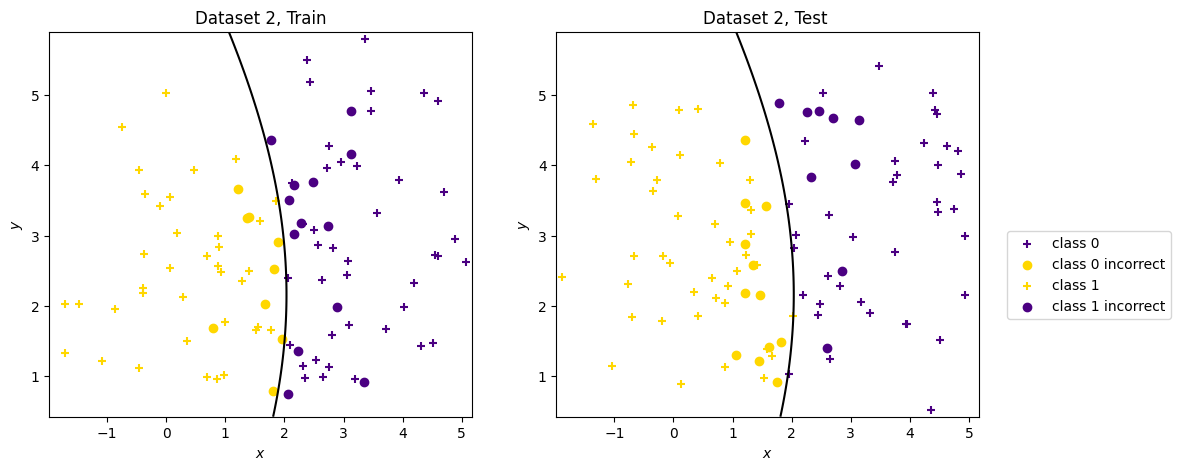

In [19]:
from sklearn.naive_bayes import GaussianNB

for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    Y = ds_train[1]
    
        
    X_test = ds_test[0]
    Y_test = ds_test[1]
    # 1) train weights
    model = GaussianNB()
    #let's fit the model (learn its parameters)
    model.fit(X, Y)

    # 2) Calculate the discriminant function and predict 
    # a) for test data
    pred_test = model.predict(X_test)

    # b) for training data
    pred_train = model.predict(X)

    
    # 4) plot predictions
    plot_predictions(i,X,Y, X_test, Y_test, pred_train, pred_test,  plot_nb=model)